In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB
None
Loan_ID               0
Gender                0
Married               0
Dependents           12
Education  

In [5]:
print("Categorical variables:", data.select_dtypes(include='object').shape[1])
#returns the number of column with categorical variable

Categorical variables: 7


In [6]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True) #defines uniqueness,no use in defining predictions


Total Categorical Columns: 6


C:\Users\jsb26\AppData\Local\Temp\ipykernel_20716\2376736038.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col].value_counts().index,
C:\Users\jsb26\AppData\Local\Temp\ipykernel_20716\2376736038.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col].value_counts().index,
C:\Users\jsb26\AppData\Local\Temp\ipykernel_20716\2376736038.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[col].value_counts().index,
C:\Users\jsb26\AppData\Local\Temp\ipykernel_20716\2376736038.py:13: FutureWarning: 

Passing `palette` 

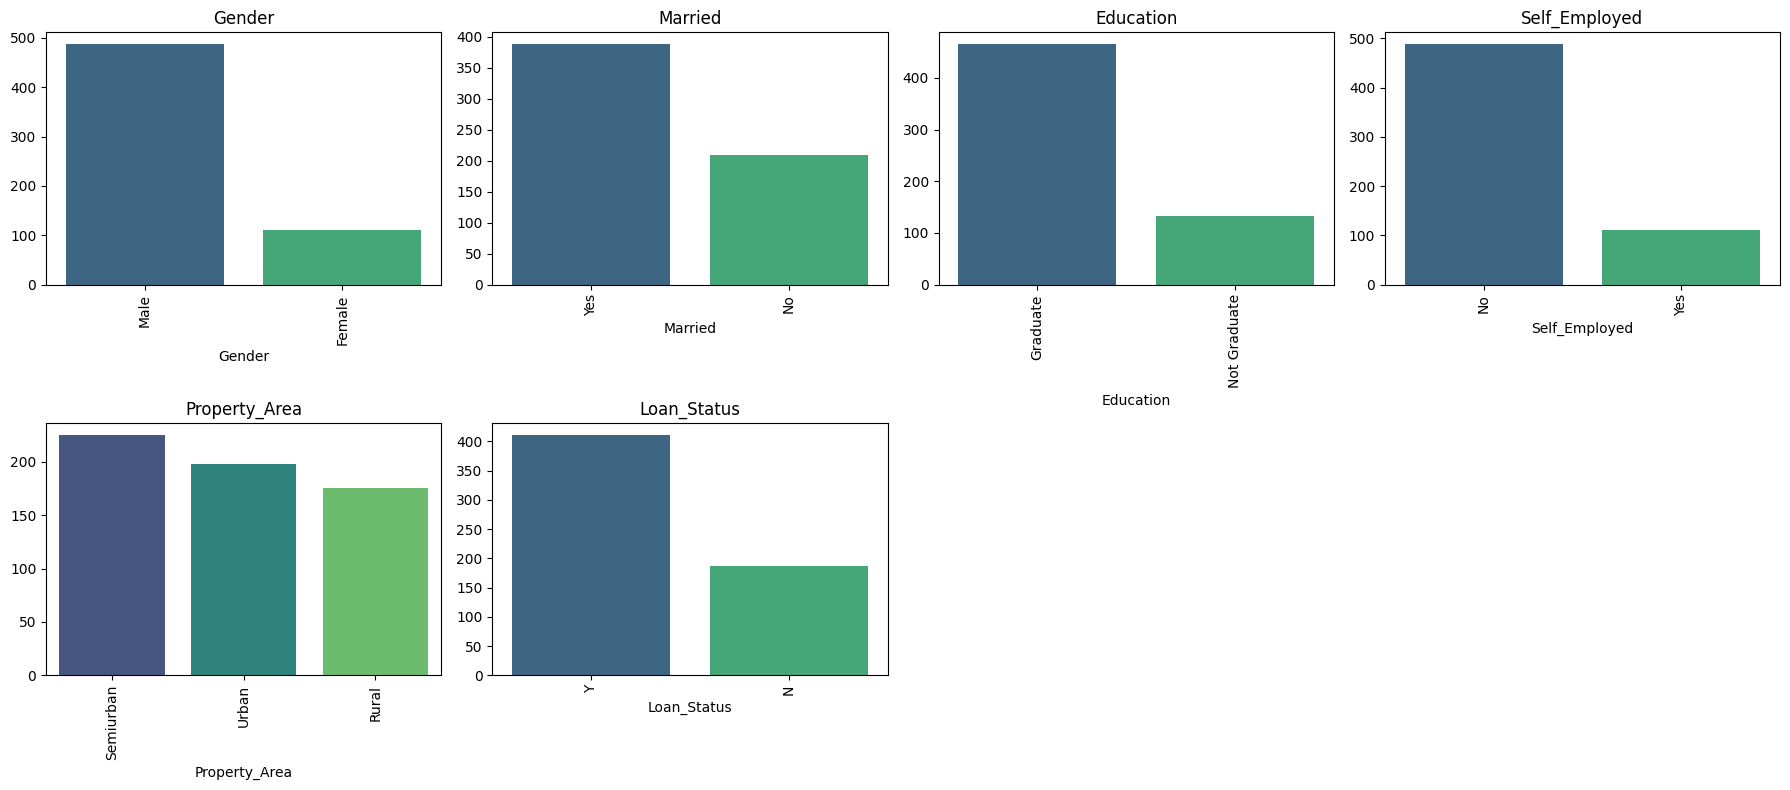

In [ ]:
# Select categorical columns
object_cols = data.select_dtypes(include=['object']).columns
num_cols = len(object_cols)
print(f"Total Categorical Columns: {num_cols}")

# Set up figure size dynamically based on the number of categorical variables
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Adjust rows dynamically for better layout

plt.figure(figsize=(18, rows * 4))  # Dynamic height based on the number of plots

for index, col in enumerate(object_cols, 1):
    plt.subplot(rows, 4, index)  # Adjust subplot layout dynamically
    sns.barplot(x=data[col].value_counts().index, 
                y=data[col].value_counts().values, 
                palette="viridis")  # Added color palette for better visualization
    plt.xticks(rotation=90)
    plt.title(col)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = data.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding
for col in categorical_cols:
    if data[col].nunique() <= 2:  
        # If only 2 unique values, use Label Encoding
        data[col] = label_encoder.fit_transform(data[col])
    else:
        # Otherwise, apply One-Hot Encoding
        data = pd.get_dummies(data, columns=[col], drop_first=True)



In [9]:
# To find the number of columns with 
# datatype==object
categorical_count = (data.dtypes == 'object').sum()
print(f"Categorical variables: {categorical_count}")


Categorical variables: 0


<Axes: >

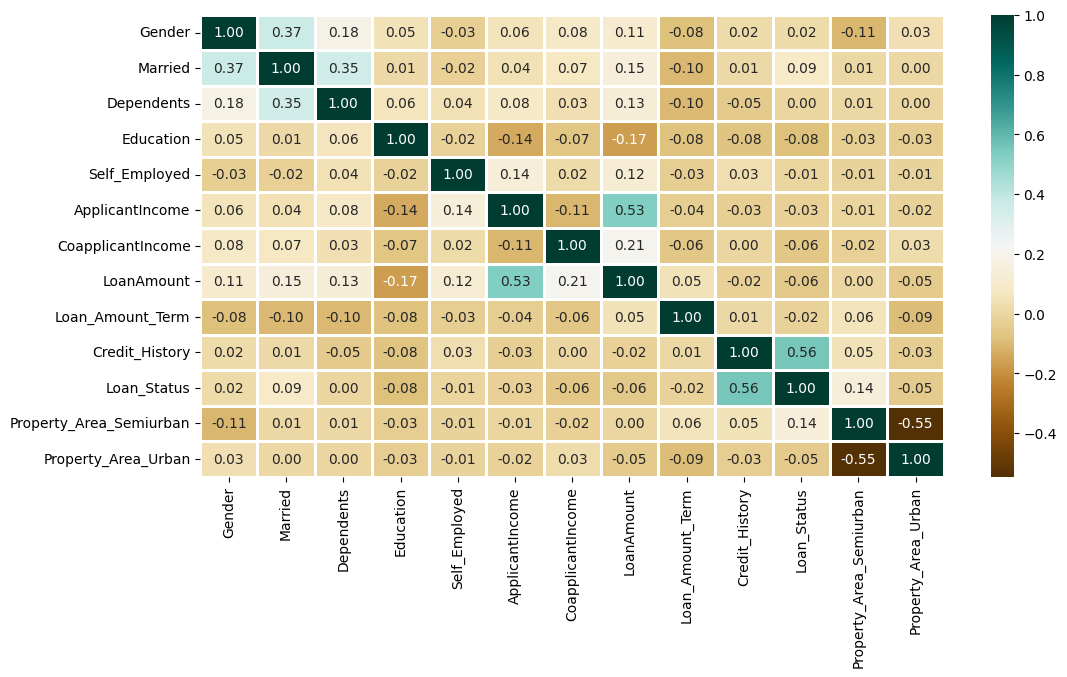

In [10]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)


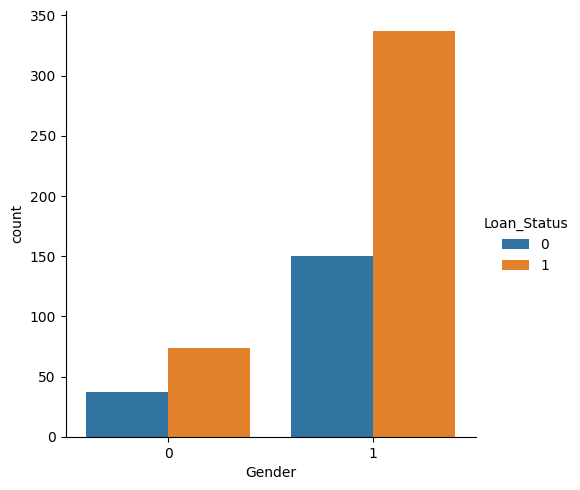

In [11]:
sns.catplot(x="Gender", hue="Loan_Status", kind="count", data=data)
#Xaxis- for Gender Catergory
#y-axis count of loan applications
# Bars-Each gender has two bars one for acceptance and other for rejection
#Different colors represent different loan status

In [12]:
num_cols = data.select_dtypes(include=['number']).columns  # Select numerical columns

for col in num_cols:
    data[col] = data[col].fillna(data[col].mean())  # Fill NaN with mean

print("Missing Values After Imputation:")
print(data.isna().sum())  # Check for remaining NaN values

Missing Values After Imputation:
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1) #independent category
Y = data['Loan_Status'] #dependent category
X.shape,Y.shape #column selection

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4, #40% for testing
                                                    random_state=1) #removes randomness
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 12), (240, 12), (358,), (240,))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train, 
                                         Y_pred))


Accuracy score of  RandomForestClassifier = 96.64804469273743
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


C:\Users\jsb26\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))


Accuracy score of  RandomForestClassifier = 76.66666666666667
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


C:\Users\jsb26\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
